<a href="https://colab.research.google.com/github/seunseitan/App-Sentiment-Analysis/blob/main/App_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries And Dataset :**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
linkedin_data = pd.read_csv(r'/content/drive/MyDrive/Python Folder/linkedin-reviews.csv')

# Display the first few rows of the dataset
print(linkedin_data.head())

                                              Review  Rating
0  Does absolutely nothing for a LinkedIn beginne...       1
1                            Force close(galaxy tab)       1
2  Slow and it tries to upload your contacts with...       1
3  Add ability to customize the profile and move ...       4
4  Good app, but it's a pain that it's not possib...       4


The dataset comprises two columns: 'Review' and 'Rating'. The 'Review' column contains textual reviews, while the 'Rating' column holds corresponding numerical ratings.

Now, let's examine the column details.

In [2]:
print(linkedin_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB
None


# **Exploratory Data Analysis**

Next, we'll delve into this data gradually. Initially, we'll examine the distribution of ratings to gain an understanding of the overall sentiment expressed in the reviews. Following that, we can delve deeper into other aspects, like the length of reviews, and potentially extract insights from the textual content.

Let's initiate by examining the distribution of ratings.

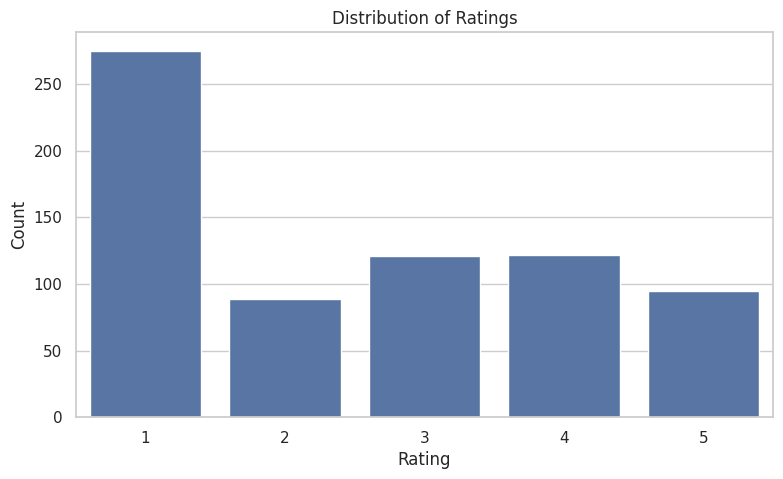

In [3]:
# Plotting the distribution of ratings
sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))
sns.countplot(data=linkedin_data, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Here is the distribution of ratings extracted from the LinkedIn reviews dataset. It provides a concise overview of the number of reviews falling into each rating category, ranging from 1 to 5.

Following this, we'll delve into the length analysis of the reviews. The length of reviews can occasionally correlate with the sentiment or the level of detail in the feedback.

We will first calculate the length of each review and then visualize the data

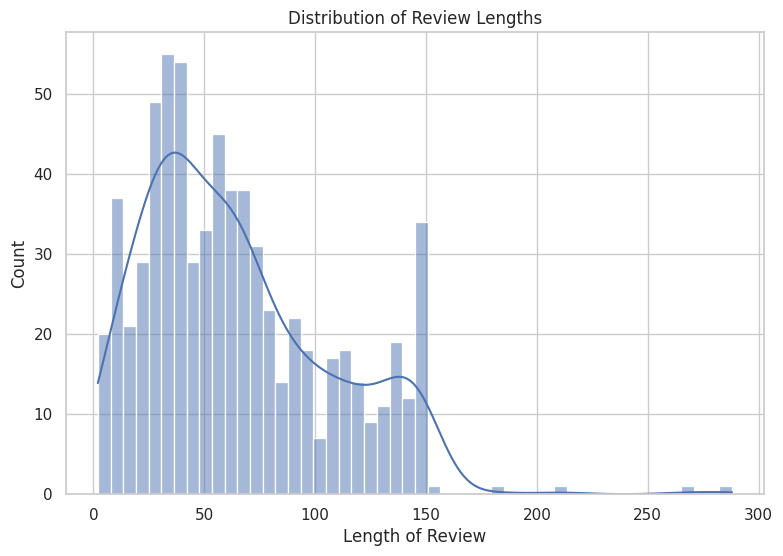

In [4]:
# Calculating the length of each review
linkedin_data['Review Length'] = linkedin_data['Review'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(9, 6))
sns.histplot(linkedin_data['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

# **Adding Sentiment Labels in the Data**:

Now, moving forward, our next task involves labeling the data with sentiments. We can accomplish this task using TextBlob. TextBlob offers a polarity score that spans from -1 (indicating very negative sentiment) to 1 (reflecting very positive sentiment) for a given text. This score enables us to categorize the sentiment of each review as positive, neutral, or negative. To install TextBlob, you can execute the following pip command in your terminal or command prompt

In [5]:
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews
linkedin_data['Sentiment'] = linkedin_data['Review'].apply(textblob_sentiment_analysis)

# Displaying the first few rows with the sentiment
print(linkedin_data.head())

                                              Review  Rating  Review Length  \
0  Does absolutely nothing for a LinkedIn beginne...       1             80   
1                            Force close(galaxy tab)       1             23   
2  Slow and it tries to upload your contacts with...       1             61   
3  Add ability to customize the profile and move ...       4             90   
4  Good app, but it's a pain that it's not possib...       4            133   

  Sentiment  
0  Negative  
1   Neutral  
2  Negative  
3   Neutral  
4  Positive  


*The dataset now includes sentiment labels for each review, classified as Positive, Negative, or Neutral based on the polarity score calculated by TextBlob.*

# **Analyzing App Reviews Sentiments**

With our dataset now labeled, let's proceed with sentiment analysis of the app reviews. We'll start by examining the distribution of sentiments throughout the dataset. This initial analysis will provide us with a fundamental insight into the overall sentiment tendencies present in the reviews.

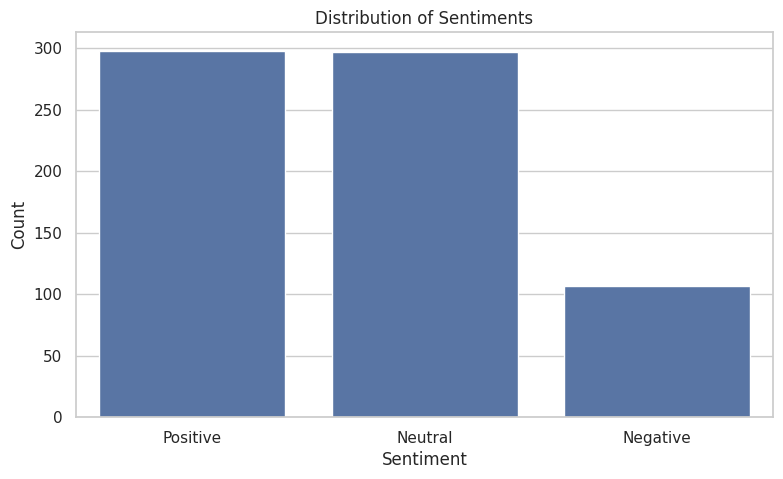

In [6]:
# Analyzing the distribution of sentiments
sentiment_distribution = linkedin_data['Sentiment'].value_counts()

# Plotting the distribution of sentiments
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Following that, we'll investigate the connection between sentiments and ratings. This examination aims to elucidate whether there exists a correlation between the sentiment expressed in the text and the numerical rating assigned. To accomplish this, we'll observe how sentiments are distributed across various rating levels.

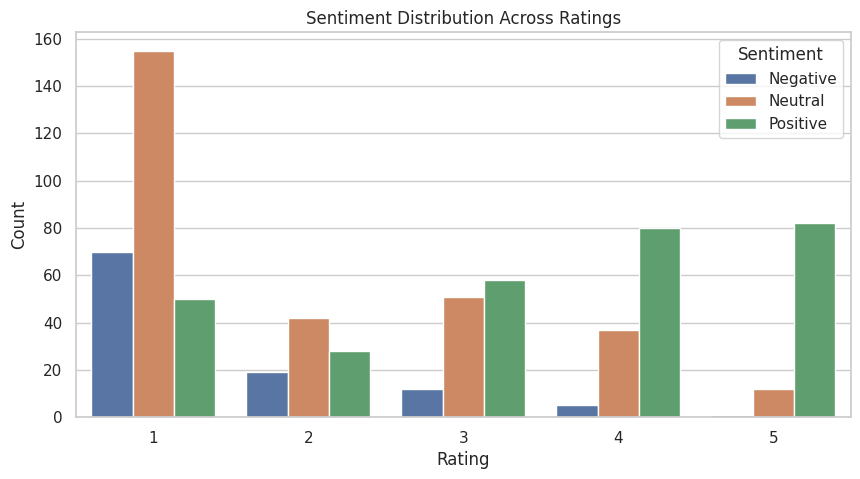

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=linkedin_data, x='Rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

Now, it's time to conduct text analysis to detect prevalent words or themes within each sentiment category. This entails scrutinizing the most commonly appearing words in positive, negative, and neutral reviews through the utilization of a word cloud

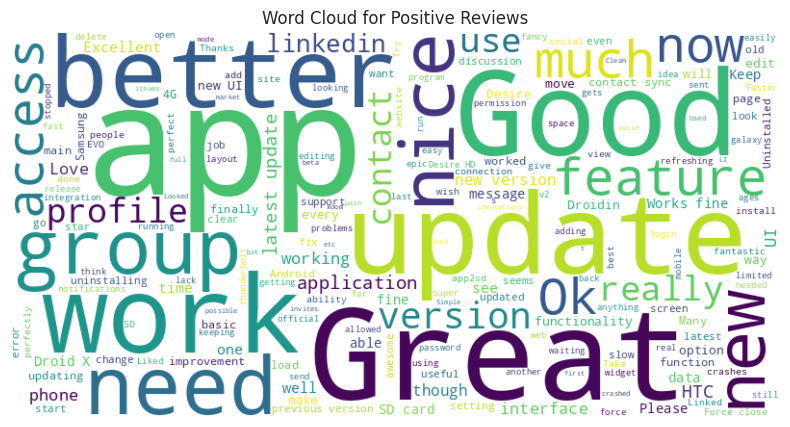

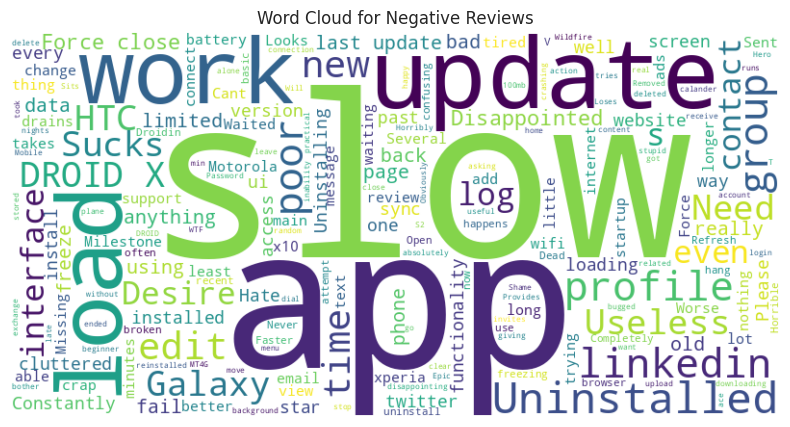

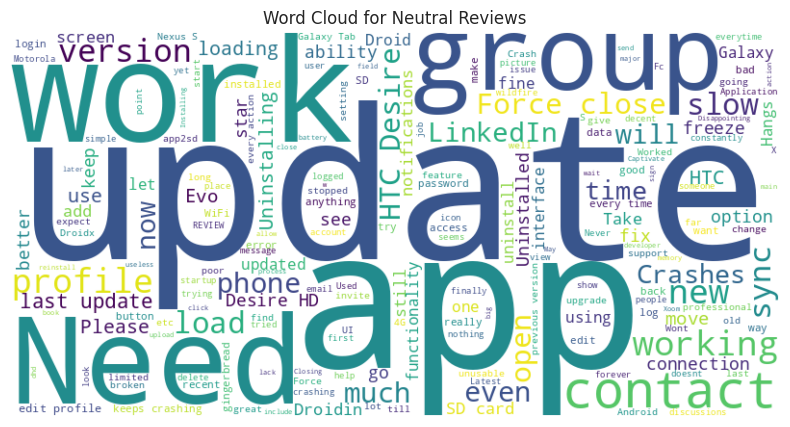

In [8]:
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in linkedin_data[linkedin_data['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)

Based on the sentiment analysis results:

- Positive reviews: Users expressed satisfaction with the app, mentioning its quality ("good," "great," "better") and functionality ("app," "version"). Additionally, the inclusion of "new" suggests a positive response to recent updates or features.

- Negative reviews: Users expressed dissatisfaction with the app's performance, citing issues such as slowness ("slow"), poor functionality ("poor"), and disappointment ("disappointed"). Words like "uninstalled" and "uninstalling" indicate frustration leading to users removing the app. The inclusion of terms like "useless" and "sucks" further emphasizes the negative sentiment.

- Neutral reviews: Users mentioned the need for updates or enhancements ("update," "need"), suggesting a neutral stance regarding the app's current state or features. The repetition of "app" indicates a general acknowledgment of the app's existence or relevance without expressing strong sentiment either positively or negatively.

In summary, positive reviews highlight satisfaction and appreciation for the app's quality and features, negative reviews indicate dissatisfaction with performance and functionality, and neutral reviews suggest a neutral stance or acknowledgment of the app's existence without strong sentiment either way.